# Project: Perform Exploratory Data Analysis on Spotify Dataset (2020 & 2021) Using Python Libraries

## Learning Object
Using Pandas, Matplotlib and Seaborn to explore trends in Spotify Top 200 Charted Songs

## Dataset

Our Dataset contains the following columns:
- Highest Charting Position: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Week of Highest Charting: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song Name: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song iD: The song ID provided by Spotify (unique to each song).
- Streams: Approximate number of streams the song has.
- Artist: The main artist/ artists involved in making the song.
- Artist Followers: The number of followers the main artist has on Spotify.
- Genre: The genres the song belongs to.
- Release Date: The initial date that the song was released.
- Weeks Charted: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Popularity:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Chord: The main chord of the song instrumental.

## Assumption
For simplicity, we would only analyse songs with **exactly one** artist!
i.e. for song "Qué Más Pues?" with ID="6hf0RpxTbOprT5nnwzkk8e", since it is performed by two artists, "J Balvin, Maria Becerra", it will be excluded from this analysis.

### Import Necessary Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Spotify Data/music.csv', index_col='Index')
df.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",12/8/2017,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,7/9/2021,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",6/25/2021,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",7/23/2021,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


### Inspect and clean up Dataset

As we only analyse songs with one artist, we have to select only the relevant songs and drop those that are not needed.

In [2]:
# Select songs with one artist
more_artists = df['Artist'].str.contains(',|&')
df = df[~more_artists]
df

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",12/8/2017,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,7/9/2021,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,5/21/2021,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"pop, uk pop",6/25/2021,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"lgbtq+ hip hop, pop rap",7/23/2021,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,178,1,2019-12-27--2020-01-03,Old Town Road,"4,852,004",Lil Nas X,5488666,2YpeDb67231RjR0MgVLzsG,"lgbtq+ hip hop, pop rap",6/21/2019,...,0.878,0.619,-5.56,0.102,0.0533,0.113,136.041,157067,0.639,F#/Gb
1550,187,1,2019-12-27--2020-01-03,Let Me Know (I Wonder Why Freestyle),"4,701,532",Juice WRLD,19102888,3wwo0bJvDSorOpNfzEkfXx,"chicago rap, melodic rap",12/7/2019,...,0.635,0.537,-7.895,0.0832,0.172,0.418,125.028,215381,0.383,G
1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"dance pop, pop, uk pop",6/2/2017,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A


In [3]:
# Check null values in the Dataset
df.isna().sum()

Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers              0
Song ID                       0
Genre                        57
Release Date                  0
Weeks Charted                 0
Popularity                    0
Danceability                  0
Energy                        0
Loudness                      0
Speechiness                   0
Acousticness                  0
Liveness                      0
Tempo                         0
Duration (ms)                 0
Valence                       0
Chord                         0
dtype: int64

In [4]:
# Replace empty space with NaN
df = df.applymap(lambda x: np.nan if x == ' ' or x == '' else x)

# Double check our results
df.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers              9
Song ID                       9
Genre                        66
Release Date                  9
Weeks Charted                 0
Popularity                    9
Danceability                  9
Energy                        9
Loudness                      9
Speechiness                   9
Acousticness                  9
Liveness                      9
Tempo                         9
Duration (ms)                 9
Valence                       9
Chord                         9
dtype: int64

Since our dataset is relatively large, we can drop rows with NaN values.

In [5]:
# Drop rows of NaN values
df = df.dropna()

# Check NaN values again
df.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [6]:
# Generate a brieft summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1116 non-null   int64 
 1   Number of Times Charted    1116 non-null   int64 
 2   Week of Highest Charting   1116 non-null   object
 3   Song Name                  1116 non-null   object
 4   Streams                    1116 non-null   object
 5   Artist                     1116 non-null   object
 6   Artist Followers           1116 non-null   object
 7   Song ID                    1116 non-null   object
 8   Genre                      1116 non-null   object
 9   Release Date               1116 non-null   object
 10  Weeks Charted              1116 non-null   object
 11  Popularity                 1116 non-null   object
 12  Danceability               1116 non-null   object
 13  Energy                     1116 non-null   object
 14  Loudness

Since our columns' datatypes are currently not the correct types, we would need to convert all of these columns into appropriate Dtypes to perform our analysis later.

In [7]:
# Remove Comma, White Space for the columns of Streams and Artist Followers and convert into the correct dtype
df['Streams'] = df['Streams'].apply(str).str.replace(',', '').astype('int64')
df['Artist Followers'] = df['Artist Followers'].str.replace(',', '').astype('float64')

# Convert relevant columns into numeric values
df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']] = df[['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']].apply(pd.to_numeric)

# Check our Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 1 to 1556
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1116 non-null   int64  
 1   Number of Times Charted    1116 non-null   int64  
 2   Week of Highest Charting   1116 non-null   object 
 3   Song Name                  1116 non-null   object 
 4   Streams                    1116 non-null   int64  
 5   Artist                     1116 non-null   object 
 6   Artist Followers           1116 non-null   float64
 7   Song ID                    1116 non-null   object 
 8   Genre                      1116 non-null   object 
 9   Release Date               1116 non-null   object 
 10  Weeks Charted              1116 non-null   object 
 11  Popularity                 1116 non-null   int64  
 12  Danceability               1116 non-null   float64
 13  Energy                     1116 non-null   float

In [8]:
# Convert Release Date into a Datetime Dtype
df['Release Date'] = pd.to_datetime(df['Release Date'])

## What are the songs that are charted the number 1 songs on Spotify?

In [54]:
df[df['Highest Charting Position'] == 1]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"indie rock italiano, italian pop",2017-12-08,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589,B
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688,A
6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565.0,67BtfxlNbhBmCDR2L2l8qd,"lgbtq+ hip hop, pop rap",2021-03-31,...,0.610,0.508,-6.682,0.1520,0.29700,0.3840,178.818,137876,0.758,G#/Ab
14,1,19,2021-04-02--2021-04-09,Peaches (feat. Daniel Caesar & Giveon),20294457,Justin Bieber,48504126.0,4iJyoBOLtHqaGxP12qzhQI,"canadian pop, pop, post-teen pop",2021-03-19,...,0.677,0.696,-6.181,0.1190,0.32100,0.4200,90.030,198082,0.464,C
23,1,29,2021-03-12--2021-03-19,drivers license,15684978,Olivia Rodrigo,6266514.0,5wANPM4fQCJwkGd4rN57mH,pop,2021-05-21,...,0.561,0.431,-8.810,0.0578,0.76800,0.1060,143.875,242013,0.137,A#/Bb
25,1,83,2020-06-12--2020-06-19,Blinding Lights,15011809,The Weeknd,35305637.0,0VjIjW4GlUZAMYd2vXMi3b,"canadian contemporary r&b, canadian pop, pop",2020-03-20,...,0.514,0.730,-5.934,0.0598,0.00146,0.0897,171.005,200040,0.334,C#/Db
47,1,51,2020-10-16--2020-10-23,Mood (feat. iann dior),10222056,24kGoldn,1274433.0,4jPy3l0RUwlUI9T5XHBW2m,cali rap,2021-03-26,...,0.701,0.716,-3.671,0.0361,0.17400,0.3240,91.007,140533,0.732,G
80,1,83,2020-02-14--2020-02-21,Dance Monkey,7687058,Tones And I,2819593.0,2XU0oxnq2qxCpomAAuJY8K,"australian pop, pop",2019-10-17,...,0.824,0.588,-6.400,0.0924,0.69200,0.1490,98.027,209438,0.513,F#/Gb
92,1,40,2020-10-30--2020-11-06,positions,7244853,Ariana Grande,67158068.0,35mvY5S1H3J2QZyna3TFe0,"dance pop, pop, post-teen pop",2020-10-30,...,0.737,0.802,-4.771,0.0878,0.46800,0.0931,144.015,172325,0.682,C


### Let's see which top 10 songs are the most popular on Spotify 2020 & 2021.

In [9]:
df[['Artist', 'Song Name', 'Release Date', 'Popularity']].sort_values(by='Popularity', ascending=False)[:10]

,Artist,Song Name,Release Date,Popularity
Index,,,,
1,Måneskin,Beggin',2017-12-08,100
3,Olivia Rodrigo,good 4 u,2021-05-21,99
2,The Kid LAROI,STAY (with Justin Bieber),2021-07-09,99
4,Ed Sheeran,Bad Habits,2021-06-25,98
6,Lil Nas X,MONTERO (Call Me By Your Name),2021-03-31,97
5,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),2021-07-23,96
9,Bad Bunny,Yonaguni,2021-06-04,96
8,Rauw Alejandro,Todo De Ti,2021-05-20,95
10,Måneskin,I WANNA BE YOUR SLAVE,2021-03-19,95


### Insight:

Based on our table above, 'Beggin' by Maneskin has become the top 1 song with the highest Popularity rating. Seem like
an unexpected success for a song released back in 2017!

### How about the top 10 most popular singers/bands on Spotify?

In [10]:
# Select artists with the highest number of Artist Followers
df.groupby('Artist')['Artist Followers'].max().sort_values(ascending=False).head(10).reset_index()

,Artist,Artist Followers
0,Ed Sheeran,83337783.0
1,Ariana Grande,67208170.0
2,Drake,56327031.0
3,Justin Bieber,48544923.0
4,Billie Eilish,47061119.0
5,Eminem,46814751.0
6,Taylor Swift,42227614.0
7,BTS,37151476.0
8,Trio Vegabajeño,36177712.0
9,Bad Bunny,36177712.0


Let's try to visualize this result a little bit better. Index() is used to store artist names as our label. As one artist has different number of followers over time, I assume that the latest number of followers would be equal to the max values.

/Users/lephungdanthanh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


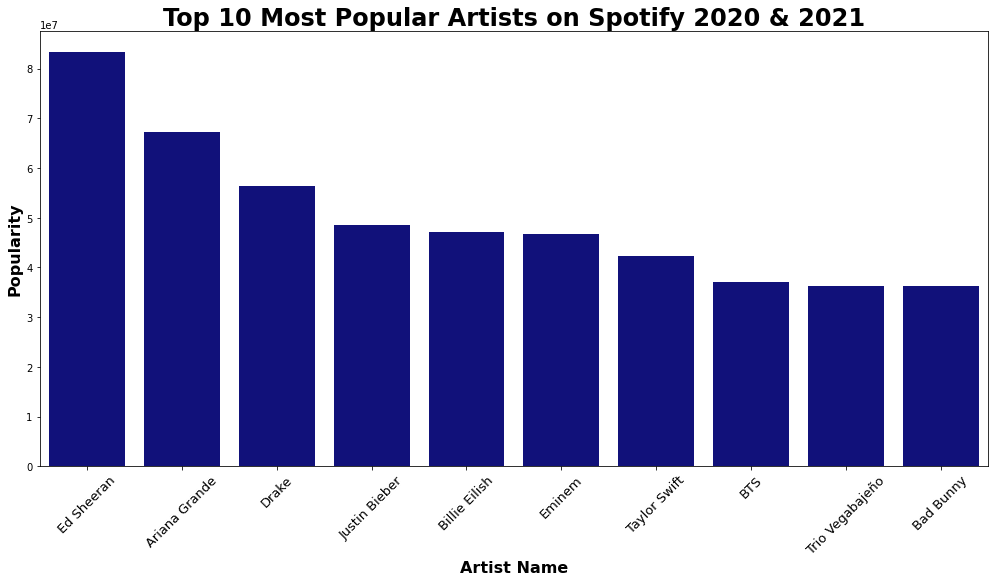

In [11]:
plt.figure(figsize=(17,8))
highest_artist_followers = df.groupby('Artist')['Artist Followers'].max().sort_values(ascending=False).head(10).reset_index()

# Generate a bar chart using Seaborn
ax = sns.barplot(highest_artist_followers['Artist'], highest_artist_followers['Artist Followers'], color='darkblue')
ax.set_title('Top 10 Most Popular Artists on Spotify 2020 & 2021', fontsize=24, weight='bold')
ax.set_ylabel('Popularity', fontsize=16, weight='bold')
ax.set_xlabel('Artist Name', fontsize=16, weight='bold')
plt.xticks(rotation = 45, fontsize=13)
plt.show()

## Insight:

Top 3 artists with the highest followers are Ed Sheeran, Ariana Grande and Drake.

### For these top 10 artist (by number of followers), do they also have the highest total number of streams?

In [21]:
# Get artists with highest total number of Streams for their songs
highest_total_streams = df.groupby('Artist')['Streams'].sum().sort_values(ascending=False).head(10).reset_index()

# Filter artists in both lists of top 10 total Streams and top 10 Artist Followers
df_intersection = pd.merge(highest_artist_followers, highest_total_streams)
df_intersection

,Artist,Artist Followers,Streams
0,Justin Bieber,48544923.0,214462424
1,Eminem,46814751.0,162935796
2,Taylor Swift,42227614.0,381480455
3,BTS,37151476.0,238400020
4,Bad Bunny,36177712.0,203813133


In [38]:
# Combine top 10 artists with highest streams and top 10 artist with highest artist followers
df_artists = df.groupby('Artist').agg({'Artist Followers':'max', 'Streams':'sum'}).reset_index()
df_union = df_artists.sort_values(['Artist Followers', 'Streams'], ascending=(False, False)).head(10) 
df_union

,Artist,Artist Followers,Streams
100,Ed Sheeran,83337783.0,75615238
21,Ariana Grande,67208170.0,121682931
94,Drake,56327031.0,128538281
158,Justin Bieber,48544923.0,214462424
45,Billie Eilish,47061119.0,51404982
105,Eminem,46814751.0,162935796
312,Taylor Swift,42227614.0,381480455
32,BTS,37151476.0,238400020
34,Bad Bunny,36177712.0,203813133
329,Trio Vegabajeño,36177712.0,5842320


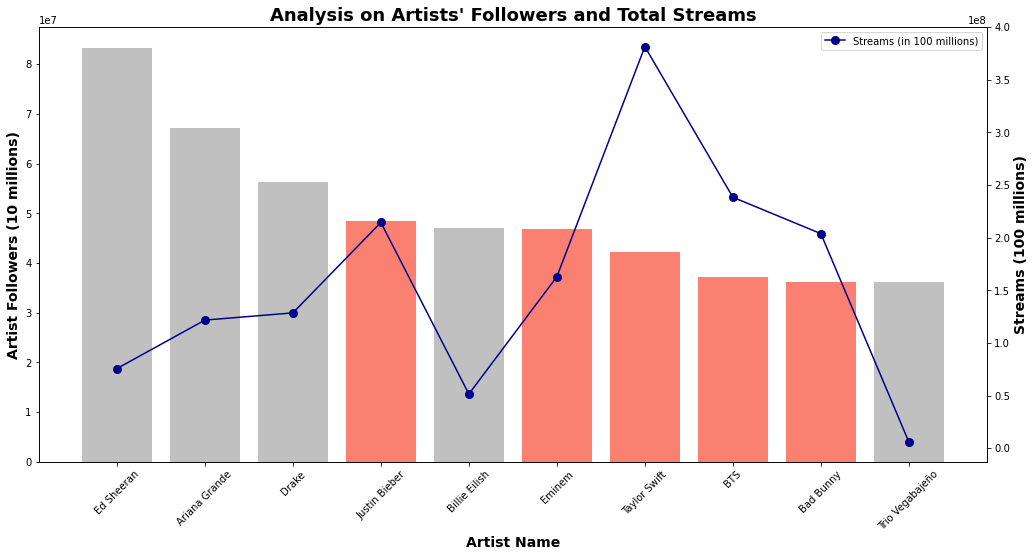

In [53]:
# Differentiate colors for artists that are in both top 10 Streams and top 10 Followers
clrs = df_union['Artist'].apply(lambda x: 'salmon' if x in list(df_intersection['Artist']) else 'silver')

# Generate bar and line chart
plt.figure(figsize=(17,8))
x = df_union['Artist']
y = df_union['Artist Followers']
bar_chart = plt.bar(x, y, label='Artist Followers', color = clrs)
plt.title("Analysis on Artists' Followers and Total Streams", fontsize=18, weight='bold')
plt.xlabel('Artist Name', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Artist Followers (10 millions)', fontsize=14, weight='bold')

ax2 = plt.twinx()
ax2.plot(df_union['Artist'], df_union['Streams'], color='darkblue', marker='o', markersize=8, label = 'Streams (in 100 millions)')
ax2.set_ylabel('Streams (100 millions)', fontsize=14, weight='bold')
plt.legend()

plt.show()

## Insight:

From the chart above, it is clear that having a large number of followers doesn't really imply that the artist would also
have a high total of streams for their songs. For example, Ed Sheeran has the highest number of followers, but is also in the top
3 lowest total streams. Meanwhile, Taylor Swift - despite having roughly half of Ed Sheeran's followers (4.2 million in comparison to
8.3 million) - enjoys the highest streaming volume for her music. (Yoohoo Swifties, we did it!)

## What are the correlation of song attributes on Spotify 2020 & 2021?

In [56]:
df.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [62]:
# Filter out song attributes
fields = ['Highest Charting Position', 'Number of Times Charted', 'Week of Highest Charting', 'Song Name', 'Streams', 'Artist', 'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted']
df_attributes = df.drop(fields, axis=1)
df_attributes.head()

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,
1,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589,B
2,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478,C#/Db
3,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688,A
4,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591,B
5,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [64]:
# Get correlation among song attributes
corr = df_attributes.corr()
corr

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
Popularity,1.000000,0.045807,0.102594,0.198251,-0.109494,-0.105117,-0.113589,-0.042328,0.040709,-0.021528
Danceability,0.045807,1.000000,0.129909,0.224609,0.287424,-0.339173,-0.073656,-0.016564,-0.163075,0.362354
Energy,0.102594,0.129909,1.000000,0.730107,0.010754,-0.584111,0.147123,0.102623,0.040071,0.321860
Loudness,0.198251,0.224609,0.730107,1.000000,-0.045148,-0.520090,0.043299,0.081291,0.062197,0.243700
Speechiness,-0.109494,0.287424,0.010754,-0.045148,1.000000,-0.146708,0.115217,0.085335,-0.136208,0.060974
Acousticness,-0.105117,-0.339173,-0.584111,-0.520090,-0.146708,1.000000,-0.044919,-0.067704,-0.034341,-0.116056
Liveness,-0.113589,-0.073656,0.147123,0.043299,0.115217,-0.044919,1.000000,-0.038693,0.024117,0.001087
Tempo,-0.042328,-0.016564,0.102623,0.081291,0.085335,-0.067704,-0.038693,1.000000,0.000251,0.045801
Duration (ms),0.040709,-0.163075,0.040071,0.062197,-0.136208,-0.034341,0.024117,0.000251,1.000000,-0.157815
Valence,-0.021528,0.362354,0.321860,0.243700,0.060974,-0.116056,0.001087,0.045801,-0.157815,1.000000


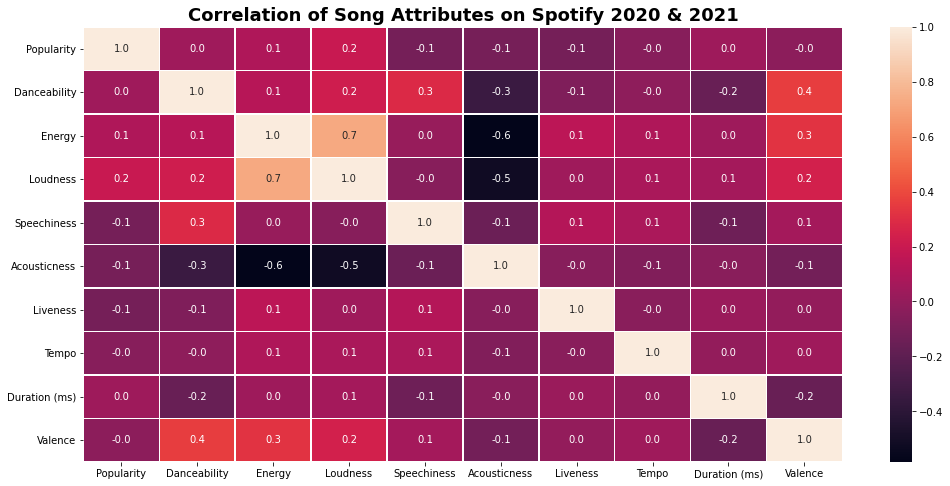

In [67]:
# Create heatmap for correlation
plt.figure(figsize=(17,8))
sns.heatmap(corr, annot=True, fmt='.1f', linecolor='white', linewidth=0.5)
plt.title("Correlation of Song Attributes on Spotify 2020 & 2021", fontsize=18, weight='bold')
plt.show()

# Insight:

The heatmap demonstrates that:
    - Energy is strongly correlated with Loudness
    - Acousticness is negatively correlated with Loudness and Energy, which makes sense since Acoustic music is often more quiet and softer.

I have so much fun coding this project (hours of Googling and figuring out errors) and would look forward to practicing more skills on Python!